In [0]:
!pip3 install detecto

In [0]:
!nvidia-smi

Mon Feb 24 03:15:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from detecto import core, utils, visualize
from matplotlib import pyplot as plt

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving buah.jpeg to buah (2).jpeg


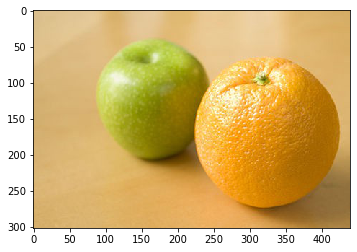

In [0]:
image = utils.read_image('buah.jpeg')
plt.imshow(image)

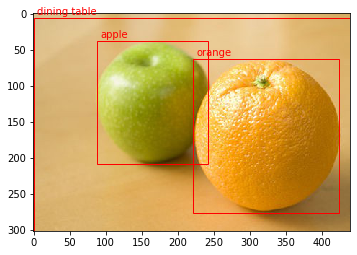

In [0]:
model = core.Model()

labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

## Advance Usage

In [0]:
from detecto import core, utils
from torchvision import transnform
import matplotlib.pyplot as plt

# Convert XML file to CSV format
utils.xml_to_csv('training_labels/', 'train_labels.csv')
utils.xml_to_csv('validation_labels/', 'val_labels.csv')

# Define custom transforms to apply to your dataset
custom_transforms = transforms.Compose([
  transforms.ToPILImage(),
  transforms.Resize(800),
  transforms.ColorJitter(saturation=0.3),
  transforms.ToTensor(),
  utils.normalize_transform(),
])

# Pass in a CSV file instead of XML files for faster Dataset initialization speeds
dataset = core.Dataset('train_labels.csv', 'images/', transform=custom_transforms)
val_dataset = core.Dataset('val_labels.csv', 'val_images') # Validation dataset for training

# Create your own DataLoader with custom options
loader = core.Dataloader(dataset, batch_size=2, shuffle=True)

model = core.Model(['car', 'truck', 'boat', 'plane'])
losses = model.fit(loader, val_dataset, epochs=15, learning_rate=0.001, verbose=True)

plt.plot(losses) #Vusialisasi Loss terhadap Training
plt.show()

model.save('model_weights.pth') # Save model to a file

# DIrectly access underlying torchvision model for even more control
torch_model = model.get_internal_model()
print(type(torch_model))